### Student Information
Name: Shaquille Hunte

Student ID: 114065427

GitHub ID: Hakeem-bit

In [1]:
# Step 1: Data Sources 
# Load the data set
# show the first 5 rows

In [4]:
import os
import pandas as pd
df = pd.read_csv("Reddit-stock-sentiment.csv")
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [5]:
#Step 2: data Preparation
# Print the number of rows and columns in the data set.
# This will provide details on the size of the dataset.

In [6]:
print("Shape of dataset (rows, columns):" , df.shape)

Shape of dataset (rows, columns): (847, 16)


In [7]:
#Prints all the columns in available in the data set.
#This displays the name of the columns and types 

In [8]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
sentiment       float64
entities         object
label           float64
dtype: object


In [9]:
#quick look at the masic numerical statistics of the dataset

In [10]:
print("\n Numeric Summary:")
df.describe()


 Numeric Summary:


,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Random Sample of the dataframe for visual check

In [12]:
display(df.sample(5))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
528,comment,2025-04-11 15:45:34,mmkwwt2,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,MidnightAlchemist,https://i.redd.it/b51iqmecn7ue1.jpeg,2,NaN,NaN,They meant the Airline,0.000000,0.000000,0.0,['Airline'],0.0
318,comment,2025-04-11 15:21:44,mmks038,stocks,Is the market in complete denial right now?,Appropriate-Note-776,https://www.reddit.com/r/stocks/comments/1jwo1...,1,NaN,NaN,If costs increase wouldn’t it just show higher...,0.500000,0.250000,1.0,"['t', '’', 'profit', 'number']",0.0
531,comment,2025-04-11 14:52:24,mmkm1t9,stocks,BREAKING: China raises tariffs on U.S. goods t...,martiben12,https://www.reddit.com/r/stocks/comments/1jwku...,1,NaN,NaN,They r superior confident that they have the c...,0.866667,0.600000,1.0,"['confident', 'card']",0.0
693,comment,2025-04-11 14:46:38,mmkkvod,StockMarket,The Trump administration is begging Xi Jinping...,cookiesnooper,https://edition.cnn.com/2025/04/10/politics/tr...,3,NaN,NaN,Trump can't get this to his head that China wa...,0.500000,0.204167,1.0,"['USA', 'steam', 'scheme', 'Trump', 'head', 'r...",-1.0
140,comment,2025-04-11 15:33:32,mmkuflw,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,ivegotwonderfulnews,https://www.reddit.com/r/stocks/comments/1jwlr...,2,NaN,NaN,wholesale ask premium on 1 oz credit suisse in...,0.900000,-0.600000,-1.0,"['yesterday', 'credit', 'ask', 'premium', 'sui...",0.0


In [13]:
#Step 3 - data Transformation

In [14]:
# Data Type converation - numerical Values 
#First - convert date/ time column
#Second - convert numberical columns that might still be string

In [15]:
if "datetime" in df.columns:
    df["datetiime"] = pd.to_datetime(df["datetime"], errors = "coerce")
    
df["entity_count"] = df["entities"].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [16]:
numeric_col = ["upvotes", "subjectivity", "polarity"]

for col in numeric_col:
    df[col] = pd.to_numeric(df[col], errors = "coerce")
print(df.dtypes)

type                    object
datetime                object
post_id                 object
subreddit               object
title                   object
author                  object
url                     object
upvotes                  int64
downvotes              float64
upvote_ratio           float64
text                    object
subjectivity           float64
polarity               float64
sentiment              float64
entities                object
label                  float64
datetiime       datetime64[ns]
entity_count             int64
dtype: object


In [17]:
#convert multiple columns which are object types of text columns

In [18]:
columns_to_convert = ["subreddit", "sentiment", "label", "type", "entities"]

for col in columns_to_convert:
    df[col] = df[col].astype('category')

print("\nDtypes after converting multiple columns:")
print(df.dtypes)


Dtypes after converting multiple columns:
type                  category
datetime                object
post_id                 object
subreddit             category
title                   object
author                  object
url                     object
upvotes                  int64
downvotes              float64
upvote_ratio           float64
text                    object
subjectivity           float64
polarity               float64
sentiment             category
entities              category
label                 category
datetiime       datetime64[ns]
entity_count             int64
dtype: object


In [19]:
#Correcting missing values in text

In [20]:
df["title"] = df["title"].fillna("")
df["text"] = df["text"].fillna("")

df["subreddit"] = df["subreddit"].str.lower().str.strip()

#Combine title and text into a single column
df["combined_text"] = df["title"] + " " + df ["text"]

print(df[["combined_text"]].head())

                                       combined_text
0  Retardation is on the menu boys! WSB is so bac...
1  Retail giant TARGET has now declined for 10 co...
2  How do you feel about a sitting president maki...
3  Who knows more? $VMAR Vision Marine Technologi...
4  The Trump administration is begging Xi Jinping...


In [21]:
#removing empty text rows

In [22]:
df = df[df["combined_text"].str.strip() !=""]

In [23]:
#Finally Confirming Changes to the dataframe

In [24]:
print("OK\\ Updated data types:")
print(df.dtypes)
print("\n\\ Shape after cleanings:", df.shape)

OK\ Updated data types:
type                   category
datetime                 object
post_id                  object
subreddit                object
title                    object
author                   object
url                      object
upvotes                   int64
downvotes               float64
upvote_ratio            float64
text                     object
subjectivity            float64
polarity                float64
sentiment              category
entities               category
label                  category
datetiime        datetime64[ns]
entity_count              int64
combined_text            object
dtype: object

\ Shape after cleanings: (847, 19)


In [25]:
#Step 4: Msising Values
#Check and sum missing values in the respective columns

In [26]:
print(" Missing values per column:")
print(df.isnull().sum())

 Missing values per column:
type               0
datetime           0
post_id            0
subreddit          0
title              0
author             0
url                0
upvotes            0
downvotes        783
upvote_ratio     783
text               0
subjectivity       0
polarity           0
sentiment          0
entities           0
label              0
datetiime          0
entity_count       0
combined_text      0
dtype: int64


In [27]:
#Check for duplicate duplicated values 

In [28]:
duplicate_rows = df[df.duplicated()]
print(f"\n - Number of duplicated rows: {duplicate_rows.shape[0]}")


 - Number of duplicated rows: 0


In [29]:
#Handling Missing Values
# Because the percetnage of missing valsues in these respective colums are so high, we will remove them. 

In [30]:
df = df.drop(columns=["downvotes", "upvote_ratio"], errors="ignore")

In [31]:
#Print columns to check after dropping missing values column

In [32]:
print("\n Columns after missin values were dropped:")
print(df.isnull().sum())


 Columns after missin values were dropped:
type             0
datetime         0
post_id          0
subreddit        0
title            0
author           0
url              0
upvotes          0
text             0
subjectivity     0
polarity         0
sentiment        0
entities         0
label            0
datetiime        0
entity_count     0
combined_text    0
dtype: int64


In [33]:
#Checking how many times a catagory appear in the dataset

In [34]:
df_category_counts = ["subreddit", "sentiment", "label", "type", "entities"]

for category in df_category_counts:
    if category in df.columns:
        print(f"\n column:{category},counts:")
        print(df[category].value_counts(dropna=False).head(10))
        print("__" * 40)
    


 column:subreddit,counts:
subreddit
stocks              274
stockmarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64
________________________________________________________________________________

 column:sentiment,counts:
sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
________________________________________________________________________________

 column:label,counts:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
________________________________________________________________________________

 column:type,counts:
type
comment    783
post        64
Name: count, dtype: int64
________________________________________________________________________________

 column:entities,counts:
entities
[]                                                                                                                                                                                                               

In [35]:
#Step 5: Data Preprocessing 
# sampling 

In [39]:
df_sample = df.sample(100, random_state=42)
print("\n Sample dataset created with shape:", df_sample.shape)


 Sample dataset created with shape: (100, 17)


In [40]:
len(df_sample)

100

In [41]:
X_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,datetiime,entity_count,combined_text
457,comment,2025-04-11 15:42:58,mmkwda9,stockmarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,"""We"" who?",0.000000,0.000000,0.0,[],0.0,2025-04-11 15:42:58,0,Trump: We Are Doing Really Well On Our Tariff ...
342,comment,2025-04-12 3:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0,2025-04-12 03:04:05,0,Retail giant TARGET has now declined for 10 co...
280,comment,2025-04-10 14:40:26,mme8wxn,stockmarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0,2025-04-10 14:40:26,0,How do you feel about a sitting president maki...
275,comment,2025-04-12 2:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,2025-04-12 02:27:29,0,Retail giant TARGET has now declined for 10 co...


In [37]:
X = df
X_sample = df_sample.copy()

for d in [X, X_sample]:
    d['combined_text'] = (d['title'].fillna('') + ' ' + d['text'].fillna('')).str.strip()

print("Columns now include:", list(X_sample.columns))
print("Sample of combined_text column:\n", X_sample['combined_text'].head(3))
print("Shape of X_sample:", X_sample.shape)


Columns now include: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label', 'datetiime', 'entity_count', 'combined_text']
Sample of combined_text column:
 457    Trump: We Are Doing Really Well On Our Tariff ...
342    Retail giant TARGET has now declined for 10 co...
280    How do you feel about a sitting president maki...
Name: combined_text, dtype: object
Shape of X_sample: (100, 17)


In [ ]:
# Tokenize Text. using build_analyzer

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english', lowercase=True)

X_counts = vectorizer.fit_transform(X_sample['combined_text'])

X_counts_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
#Printing the Features

In [73]:
print("Feature names (first 20):", vectorizer.get_feature_names_out()[:20])
print("\nDocument-term matrix shape:", X_counts_df.shape)
X_counts_df.head(3)

Feature names (first 20): ['000' '02' '03' '10' '100' '10yr' '11' '125' '13' '14' '145' '15' '16'
 '17' '17th' '1952' '20' '200' '2008' '200k']

Document-term matrix shape: (100, 1077)


,000,02,03,10,100,10yr,11,125,13,14,...,wrong,wsb,x200b,xi,yamana,year,years,yelling,yes,yields
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

analyzer = vectorizer.build_analyzer()

tokens = analyzer(X_sample['combined_text'].iloc[0])

In [ ]:
print("FirstPost tokens:\n", tokens[:30])
print("\nNumber of tokens in this post:", len (tokens))

In [ ]:
#

In [51]:
from collections import Counter 
import pandas as pd

texts = X_sample['combined_text'].dropna().astype(str)

all_tokens = [token for text in texts for token in analyzer(text)]

token_freq = Counter(all_tokens)

freq_df = pd.DataFrame(token_freq.items(), columns=['Word', 'Count']).sort_values(by='Count',ascending=False)

print("Top 10 most frequent words: \n", freq_df.head(10))
print("\nTotal unique words:", freq_df.shape[0])

Top 10 most frequent words: 
            Word  Count
0         trump     35
67         2025     23
168       china     22
65       thread     20
191  discussion     17
170     tariffs     17
220     weekend     17
85           11     17
47         like     16
63       stocks     15

Total unique words: 1077


In [ ]:
#Visualization 1: 

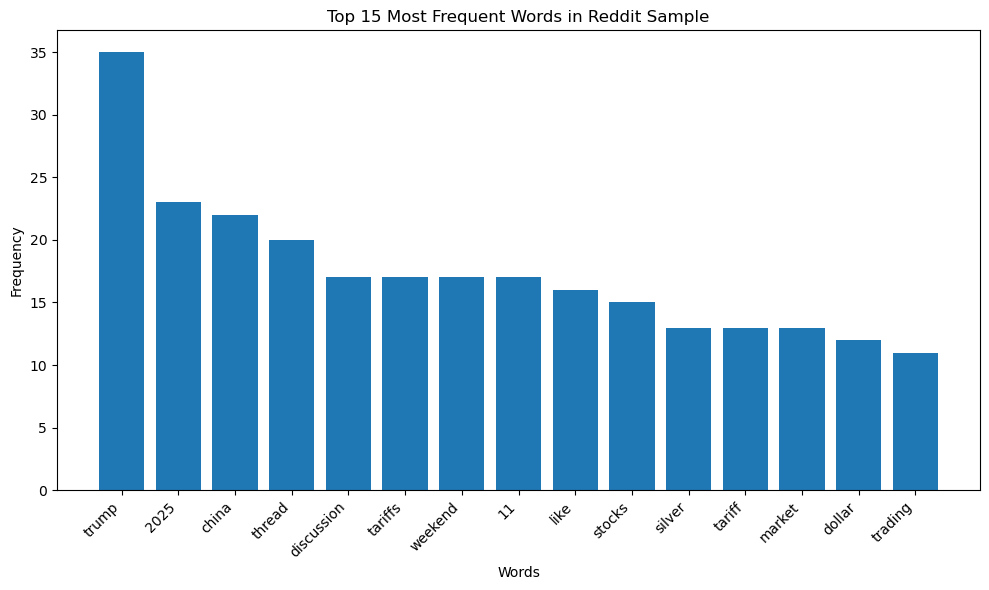

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(freq_df['Word'][:15], freq_df['Count'][:15])
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Most Frequent Words in Reddit Sample')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


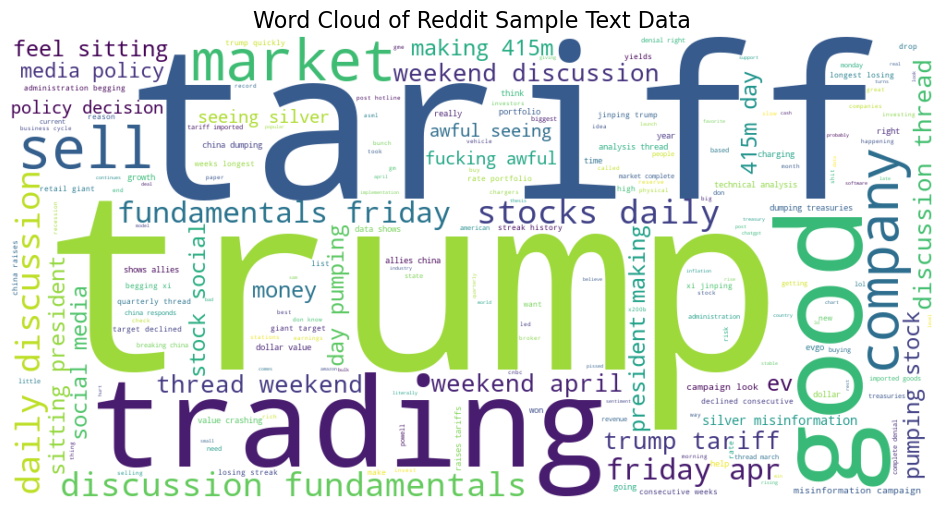

In [55]:
from wordcloud import WordCloud
text = " ".join(all_tokens)


wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# Plot it
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reddit Sample Text Data', fontsize=16)
plt.show()


In [54]:
!pip install wordcloud


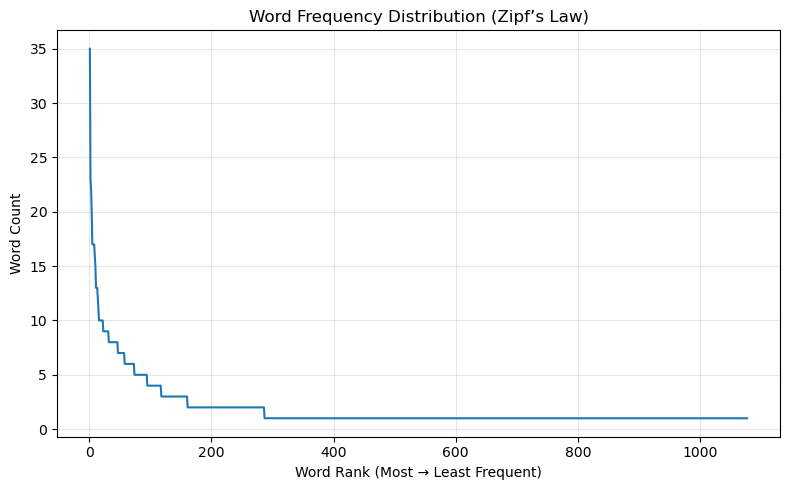

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sort word frequencies in descending order
counts = freq_df['Count'].values

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(counts)+1), counts, marker='', linestyle='-')
plt.title('Word Frequency Distribution (Zipf’s Law)')
plt.xlabel('Word Rank (Most → Least Frequent)')
plt.ylabel('Word Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [58]:
from collections import Counter

# Function to get top words for a sentiment
def get_top_words(df, sentiment_value, top_n=10):
    subset = df[df['sentiment'] == sentiment_value]['combined_text'].dropna().astype(str)
    tokens = [token for text in subset for token in analyzer(text)]
    freq = Counter(tokens)
    return pd.DataFrame(freq.most_common(top_n), columns=['Word', 'Count'])

# Get top words by sentiment
neg_words = get_top_words(X_sample, -1.0)
neu_words = get_top_words(X_sample, 0.0)
pos_words = get_top_words(X_sample, 1.0)

print("Top Negative Words:\n", neg_words, "\n")
print("Top Neutral Words:\n", neu_words, "\n")
print("Top Positive Words:\n", pos_words)


Top Negative Words:
              Word  Count
0           trump     12
1           china      6
2          silver      5
3            just      5
4         tariffs      5
5  administration      5
6           think      5
7           awful      4
8          allies      4
9      treasuries      4 

Top Neutral Words:
          Word  Count
0        2025     12
1       trump     11
2          11     11
3      thread     11
4  discussion     10
5     weekend      9
6       china      8
7      stocks      7
8       daily      7
9      tariff      6 

Top Positive Words:
         Word  Count
0       like     14
1      trump     12
2       2025      9
3  portfolio      8
4     thread      8
5    trading      8
6    company      8
7      china      8
8     stocks      7
9    tariffs      7


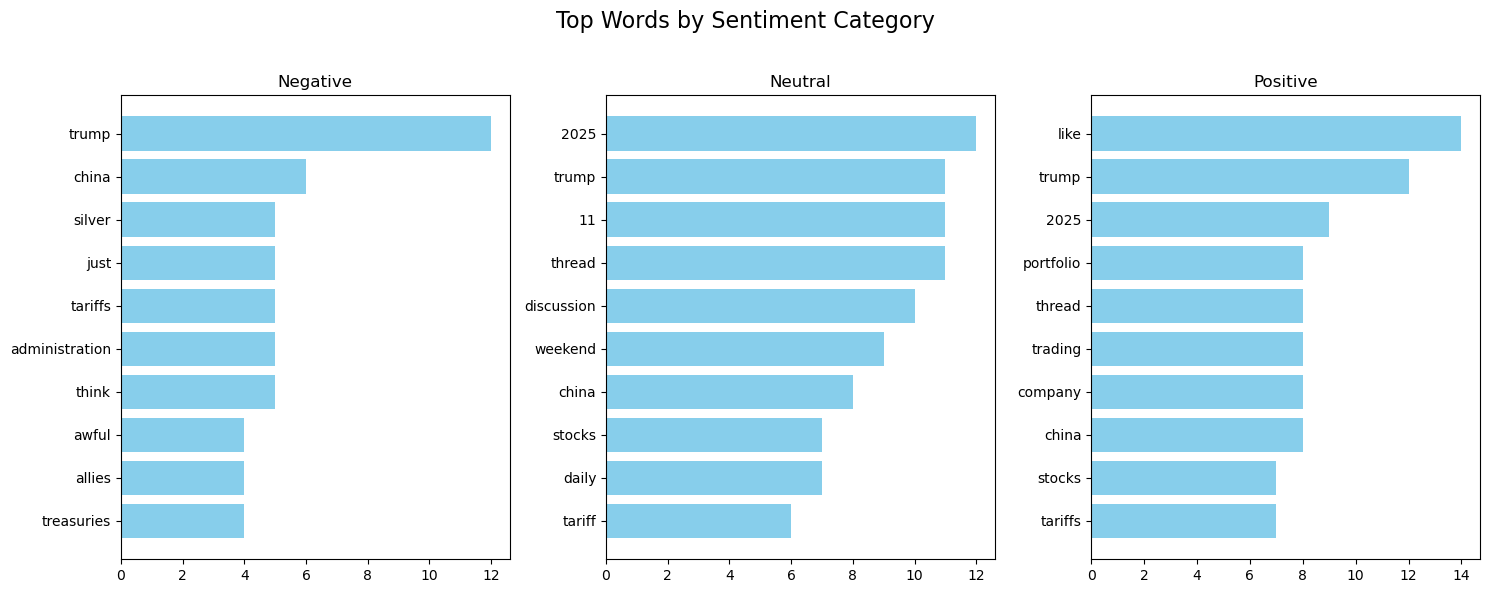

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

for ax, (data, title) in zip(axes, [(neg_words, 'Negative'), (neu_words, 'Neutral'), (pos_words, 'Positive')]):
    ax.barh(data['Word'], data['Count'], color='skyblue')
    ax.set_title(title)
    ax.invert_yaxis()

plt.suptitle('Top Words by Sentiment Category', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here